In [1]:
from qtpg.team import Team
from qtpg.learner import Learner
from qtpg.program import Program
from qtpg.rule import Rule
from qtpg.figure13 import Figure13
from qtpg.figure13_hole_in_wall import Figure13HoleInWall
from qtpg.figure12 import Figure12
from qtpg.figure9 import Figure9
from qtpg.search_manager import SearchManager
import numpy as np
import uuid
import copy
import matplotlib.pyplot as plt

In [2]:
# env params
memorySize = 40
legalMove = 0.1
illegalMove = -0.01
outOfBounds = 0.0
memoryRepeat = -0.01
# memoryRepeat = 0.0
goalReached = 100

# envName = 'Figure 13'
# env = Figure13(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 13 Hole in Wall'
# env = Figure13HoleInWall(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 12'
# env = Figure12(5, 5, (4, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
envName = 'Figure 9'
env = Figure9(10, 10, (4, 9), (0, 3), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)

In [3]:
numGens = 200
maxTeamPool = 5
runs = 20
# init search manager and starting teams

# searchManager = SearchManager(maxTeamPool)

# # init teams
# adam_and_eve = []
# env.reset()
# init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
# init_team.init_search(env, [2, 3])
# adam_and_eve.append(init_team)
# win = False
# for adam in adam_and_eve:
# #     win = adam.search(env)
#     data = [adam, win]
#     searchManager.evaluate_team(data)

# variables for tracking fitness, for curves
scores = []
gens = []
maxes = []
averages = []
mins = []

run_winners = []
runs_score_track = []

for run in range(runs):
    maxes = []
    averages = []
    mins = []
    gens = []
    print(run)
    # init everything for new run
    searchManager = SearchManager(maxTeamPool)
    
    adam_and_eve = []
    env.reset()
    init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
    init_team.init_search(env, [2, 3])
    adam_and_eve.append(init_team)
    win = False
    for adam in adam_and_eve:
        data = [adam, win]
        searchManager.evaluate_team(data)
    
    
    for gen in range(numGens):
        print(f'GEN --> {gen}')
    #     if win:
    #         print(f'got to --> gen {gen+1}')
    #         break
        toEvaluateAfterGen = []
        scores = []
#         print(f'>>>>>>>>>>>>>>>>>>>>>>>Gen {gen+1} start!>>>>>>>>>>>>>>>>>>>>>>>')
        # get it started
        for parent in searchManager.teamPool:
            # only run if the team has not yet won
            if parent not in searchManager.winners:
#                 print(f'Parent: {parent.id}')
        #             print(f'Start: {parent.start_state}')
                env.current_state = parent.start_state

                # make offspring from parent, then let that offspring make a new rule
                child = copy.deepcopy(parent)
                child.id = uuid.uuid4()
                win = child.search_no_back_track(env)
#                 print(f'Child: {child.id}')
#                 print('Start Child Regions --------')
#                 for learner in child.learners:
#                     print(learner.program.rule.region)
#                 print('End Child Regions --------')
#                 print(f'Child Fitness: {child.fitness}') 
                toEvaluateAfterGen.append([child, win])
                scores.append(child)
            else:
#                 print(f'Skipping Team: {parent.id}')
#                 print(parent.fitness)
                scores.append(parent)

        for data in toEvaluateAfterGen:
            searchManager.evaluate_team(data)
#         print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
#         print(f'End of Gen {gen+1} Regions')
#         for i in range(len(searchManager.teamPool)):
#             print(f'Team: {i+1} --> {searchManager.teamPool[i].fitness}')
#             for learner in searchManager.teamPool[i].learners:
#                 print(learner.program.rule.region)
#         print(f'>>>>>>>>>>>>>>>>>>>>>>>Gen {gen+1} end!>>>>>>>>>>>>>>>>>>>>>>>')
        # start: manage fitness curves (at end of gen)
        gens.append(gen)
        total = 0
        max_fitness = -100
        min_fitness = 100

        for team in scores:
            total += team.fitness
            if team.fitness > max_fitness:
                max_fitness = team.fitness
            if team.fitness < min_fitness:
                min_fitness = team.fitness
        average_fitness = total / len(searchManager.teamPool)
        maxes.append(max_fitness)
        averages.append(average_fitness)
        mins.append(min_fitness)

#         team_index = 0
#         for team in searchManager.teamPool:
#             team_index += 1
#             print(f'Team: {team_index} regions -- ', end='')
#             for learner in team.learners:
#                 print(f'{learner.program.rule.region}, ', end='')
#             print(f'fitness -- {team.fitness}')
#             print('')
    runs_score_track.append({'run': run, 'maxes': maxes, 'averages': averages, 'mins': mins})
        # end: manage fitness curves (at end of gen)
#     for team in searchManager.winners:
#         print('$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$')
#         print(team.fitness)
#         print('Learners:')
#         for learner in team.learners:
#             print(f'Region: {learner.program.rule.region} --> Action: {learner.program.rule.action_set}')
#         print('$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$')
    
    run_winners.append({'run': run, 'winners': searchManager.winners})

0
GEN --> 0
GEN --> 1
GEN --> 2
GEN --> 3
GEN --> 4
GEN --> 5
GEN --> 6
GEN --> 7
GEN --> 8
GEN --> 9
GEN --> 10
GEN --> 11
GEN --> 12
GEN --> 13
GEN --> 14
GEN --> 15
GEN --> 16
GEN --> 17
GEN --> 18
GEN --> 19
GEN --> 20
GEN --> 21
GEN --> 22
GEN --> 23
GEN --> 24
GEN --> 25
GEN --> 26
GEN --> 27
GEN --> 28
GEN --> 29
GEN --> 30
GEN --> 31
GEN --> 32
GEN --> 33
GEN --> 34
GEN --> 35
GEN --> 36
GEN --> 37
GEN --> 38
GEN --> 39
GEN --> 40
GEN --> 41
GEN --> 42
GEN --> 43
GEN --> 44
GEN --> 45
GEN --> 46
GEN --> 47
GEN --> 48
GEN --> 49
GEN --> 50
GEN --> 51
GEN --> 52
GEN --> 53
GEN --> 54
GEN --> 55
GEN --> 56
GEN --> 57
GEN --> 58
GEN --> 59
GEN --> 60
GEN --> 61
GEN --> 62
GEN --> 63
GEN --> 64
GEN --> 65
GEN --> 66
GEN --> 67
GEN --> 68
GEN --> 69
GEN --> 70
GEN --> 71
GEN --> 72
GEN --> 73
GEN --> 74
GEN --> 75
GEN --> 76
GEN --> 77
GEN --> 78
GEN --> 79
GEN --> 80
GEN --> 81
GEN --> 82
GEN --> 83
GEN --> 84
GEN --> 85
GEN --> 86
GEN --> 87
GEN --> 88
GEN --> 89
GEN --> 90
GEN -->

GEN --> 125
GEN --> 126
GEN --> 127
GEN --> 128
GEN --> 129
GEN --> 130
GEN --> 131
GEN --> 132
GEN --> 133
GEN --> 134
GEN --> 135
GEN --> 136
GEN --> 137
GEN --> 138
GEN --> 139
GEN --> 140
GEN --> 141
GEN --> 142
GEN --> 143
GEN --> 144
GEN --> 145
GEN --> 146
GEN --> 147
GEN --> 148
GEN --> 149
GEN --> 150
GEN --> 151
GEN --> 152
GEN --> 153
GEN --> 154
GEN --> 155
GEN --> 156
GEN --> 157
GEN --> 158
GEN --> 159
GEN --> 160
GEN --> 161
GEN --> 162
GEN --> 163
GEN --> 164
GEN --> 165
GEN --> 166
GEN --> 167
GEN --> 168
GEN --> 169
GEN --> 170
GEN --> 171
GEN --> 172
GEN --> 173
GEN --> 174
GEN --> 175
GEN --> 176
GEN --> 177
GEN --> 178
GEN --> 179
GEN --> 180
GEN --> 181
GEN --> 182
GEN --> 183
GEN --> 184
GEN --> 185
GEN --> 186
GEN --> 187
GEN --> 188
GEN --> 189
GEN --> 190
GEN --> 191
GEN --> 192
GEN --> 193
GEN --> 194
GEN --> 195
GEN --> 196
GEN --> 197
GEN --> 198
GEN --> 199
4
GEN --> 0
GEN --> 1
GEN --> 2
GEN --> 3
GEN --> 4
GEN --> 5
GEN --> 6
GEN --> 7
GEN --> 8
GEN --> 

GEN --> 53
GEN --> 54
GEN --> 55
GEN --> 56
GEN --> 57
GEN --> 58
GEN --> 59
GEN --> 60
GEN --> 61
GEN --> 62
GEN --> 63
GEN --> 64
GEN --> 65
GEN --> 66
GEN --> 67
GEN --> 68
GEN --> 69
GEN --> 70
GEN --> 71
GEN --> 72
GEN --> 73
GEN --> 74
GEN --> 75
GEN --> 76
GEN --> 77
GEN --> 78
GEN --> 79
GEN --> 80
GEN --> 81
GEN --> 82
GEN --> 83
GEN --> 84
GEN --> 85
GEN --> 86
GEN --> 87
GEN --> 88
GEN --> 89
GEN --> 90
GEN --> 91
GEN --> 92
GEN --> 93
GEN --> 94
GEN --> 95
GEN --> 96
GEN --> 97
GEN --> 98
GEN --> 99
GEN --> 100
GEN --> 101
GEN --> 102
GEN --> 103
GEN --> 104
GEN --> 105
GEN --> 106
GEN --> 107
GEN --> 108
GEN --> 109
GEN --> 110
GEN --> 111
GEN --> 112
GEN --> 113
GEN --> 114
GEN --> 115
GEN --> 116
GEN --> 117
GEN --> 118
GEN --> 119
GEN --> 120
GEN --> 121
GEN --> 122
GEN --> 123
GEN --> 124
GEN --> 125
GEN --> 126
GEN --> 127
GEN --> 128
GEN --> 129
GEN --> 130
GEN --> 131
GEN --> 132
GEN --> 133
GEN --> 134
GEN --> 135
GEN --> 136
GEN --> 137
GEN --> 138
GEN --> 139
GEN

GEN --> 167
GEN --> 168
GEN --> 169
GEN --> 170
GEN --> 171
GEN --> 172
GEN --> 173
GEN --> 174
GEN --> 175
GEN --> 176
GEN --> 177
GEN --> 178
GEN --> 179
GEN --> 180
GEN --> 181
GEN --> 182
GEN --> 183
GEN --> 184
GEN --> 185
GEN --> 186
GEN --> 187
GEN --> 188
GEN --> 189
GEN --> 190
GEN --> 191
GEN --> 192
GEN --> 193
GEN --> 194
GEN --> 195
GEN --> 196
GEN --> 197
GEN --> 198
GEN --> 199
11
GEN --> 0
GEN --> 1
GEN --> 2
GEN --> 3
GEN --> 4
GEN --> 5
GEN --> 6
GEN --> 7
GEN --> 8
GEN --> 9
GEN --> 10
GEN --> 11
GEN --> 12
GEN --> 13
GEN --> 14
GEN --> 15
GEN --> 16
GEN --> 17
GEN --> 18
GEN --> 19
GEN --> 20
GEN --> 21
GEN --> 22
GEN --> 23
GEN --> 24
GEN --> 25
GEN --> 26
GEN --> 27
GEN --> 28
GEN --> 29
GEN --> 30
GEN --> 31
GEN --> 32
GEN --> 33
GEN --> 34
GEN --> 35
GEN --> 36
GEN --> 37
GEN --> 38
GEN --> 39
GEN --> 40
GEN --> 41
GEN --> 42
GEN --> 43
GEN --> 44
GEN --> 45
GEN --> 46
GEN --> 47
GEN --> 48
GEN --> 49
GEN --> 50
GEN --> 51
GEN --> 52
GEN --> 53
GEN --> 54
GEN --

GEN --> 97
GEN --> 98
GEN --> 99
GEN --> 100
GEN --> 101
GEN --> 102
GEN --> 103
GEN --> 104
GEN --> 105
GEN --> 106
GEN --> 107
GEN --> 108
GEN --> 109
GEN --> 110
GEN --> 111
GEN --> 112
GEN --> 113
GEN --> 114
GEN --> 115
GEN --> 116
GEN --> 117
GEN --> 118
GEN --> 119
GEN --> 120
GEN --> 121
GEN --> 122
GEN --> 123
GEN --> 124
GEN --> 125
GEN --> 126
GEN --> 127
GEN --> 128
GEN --> 129
GEN --> 130
GEN --> 131
GEN --> 132
GEN --> 133
GEN --> 134
GEN --> 135
GEN --> 136
GEN --> 137
GEN --> 138
GEN --> 139
GEN --> 140
GEN --> 141
GEN --> 142
GEN --> 143
GEN --> 144
GEN --> 145
GEN --> 146
GEN --> 147
GEN --> 148
GEN --> 149
GEN --> 150
GEN --> 151
GEN --> 152
GEN --> 153
GEN --> 154
GEN --> 155
GEN --> 156
GEN --> 157
GEN --> 158
GEN --> 159
GEN --> 160
GEN --> 161
GEN --> 162
GEN --> 163
GEN --> 164
GEN --> 165
GEN --> 166
GEN --> 167
GEN --> 168
GEN --> 169
GEN --> 170
GEN --> 171
GEN --> 172
GEN --> 173
GEN --> 174
GEN --> 175
GEN --> 176
GEN --> 177
GEN --> 178
GEN --> 179
GEN -->

GEN --> 14
GEN --> 15
GEN --> 16
GEN --> 17
GEN --> 18
GEN --> 19
GEN --> 20
GEN --> 21
GEN --> 22
GEN --> 23
GEN --> 24
GEN --> 25
GEN --> 26
GEN --> 27
GEN --> 28
GEN --> 29
GEN --> 30
GEN --> 31
GEN --> 32
GEN --> 33
GEN --> 34
GEN --> 35
GEN --> 36
GEN --> 37
GEN --> 38
GEN --> 39
GEN --> 40
GEN --> 41
GEN --> 42
GEN --> 43
GEN --> 44
GEN --> 45
GEN --> 46
GEN --> 47
GEN --> 48
GEN --> 49
GEN --> 50
GEN --> 51
GEN --> 52
GEN --> 53
GEN --> 54
GEN --> 55
GEN --> 56
GEN --> 57
GEN --> 58
GEN --> 59
GEN --> 60
GEN --> 61
GEN --> 62
GEN --> 63
GEN --> 64
GEN --> 65
GEN --> 66
GEN --> 67
GEN --> 68
GEN --> 69
GEN --> 70
GEN --> 71
GEN --> 72
GEN --> 73
GEN --> 74
GEN --> 75
GEN --> 76
GEN --> 77
GEN --> 78
GEN --> 79
GEN --> 80
GEN --> 81
GEN --> 82
GEN --> 83
GEN --> 84
GEN --> 85
GEN --> 86
GEN --> 87
GEN --> 88
GEN --> 89
GEN --> 90
GEN --> 91
GEN --> 92
GEN --> 93
GEN --> 94
GEN --> 95
GEN --> 96
GEN --> 97
GEN --> 98
GEN --> 99
GEN --> 100
GEN --> 101
GEN --> 102
GEN --> 103
GEN --

In [4]:
#fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for average in averages:
#     y.append(average)
# plt.xlabel('Generation')
# plt.ylabel('Average Score')
# plt.plot(x, y)
# plt.show()

In [5]:
# #fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for max_ in maxes:
#     y.append(max_)
# plt.xlabel('Generation')
# plt.ylabel('Max Score')
# plt.plot(x, y)
# plt.show()

In [6]:
for team in searchManager.winners:
    print('$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$')
    print(team.fitness)
    print('Learners:')
    for learner in team.learners:
        print(f'Region: {learner.program.rule.region} --> Action: {learner.program.rule.action_set}')
    print('$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$')

$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$
163.52999999999997
Learners:
Region: [0, 0, 0, 0] --> Action: [2, 3]
Region: [0, 0, 2, 4] --> Action: [2, 3]
Region: [1, 1, 0, 3] --> Action: [0, 1]
Region: [1, 1, 5, 9] --> Action: [0, 1]
Region: [0, 4, 1, 1] --> Action: [2, 3]
Region: [1, 0, 0, 0] --> Action: [0, 1]
Region: [1, 0, 2, 9] --> Action: [0, 1]
Region: [0, 1, 0, 0] --> Action: [2, 3]
Region: [0, 1, 2, 4] --> Action: [2, 3]
Region: [1, 1, 0, 4] --> Action: [0, 1]
Region: [1, 1, 6, 9] --> Action: [0, 1]
Region: [0, 5, 1, 7] --> Action: [2, 3]
Region: [1, 0, 0, 7] --> Action: [0, 1]
Region: [1, 0, 9, 9] --> Action: [0, 1]
Region: [0, 8, 0, 4] --> Action: [2, 3]
Region: [1, 5, 6, 9] --> Action: [0, 1]
Region: [0, 5, 0, 1] --> Action: [2, 3]
Region: [0, 5, 3, 7] --> Action: [2, 3]
Region: [1, 2, 6, 9] --> Action: [0, 1]
Region: [0, 5, 0, 1] --> Action: [2, 3]
Region: [0, 5, 3, 7] --> Action: [2, 3]
Region: [1, 2, 5, 8] --> Action: [0, 1]
Region: [0, 9, 1, 9] --> Action: [2, 3]

## Average Max Fitness Curves

In [7]:
print(runs_score_track[0]['maxes'][0])
print(len(runs_score_track))
print(len(runs_score_track[0]))
print(len(runs_score_track[0]['maxes']))

1.03
20
4
200


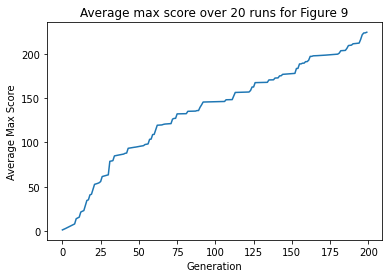

In [8]:
#fitness curves
x = []
y = []
average_maxes = np.zeros(numGens)
# average_maxes = np.zeros(100)

for i in range(len(gens)):
    for q in range(len(runs_score_track)):
        average_maxes[i] += runs_score_track[q]['maxes'][i]
    average_maxes[i] /= len(runs_score_track)
    
for gen in gens:
    x.append(gen)

plt.title(f'Average max score over {len(runs_score_track)} runs for {envName}')
plt.xlabel('Generation')
plt.ylabel('Average Max Score')
plt.plot(x, average_maxes)
plt.show()

## Reinforcement Learning + Victory Lap

In [9]:
print(run_winners)
for learner in team.learners:
    print(learner.program.rule.region)

[{'run': 0, 'winners': [<qtpg.team.Team object at 0x7f92990f6eb0>, <qtpg.team.Team object at 0x7f92991536d0>, <qtpg.team.Team object at 0x7f92991535e0>, <qtpg.team.Team object at 0x7f929917a850>, <qtpg.team.Team object at 0x7f92990db0d0>]}, {'run': 1, 'winners': [<qtpg.team.Team object at 0x7f92991f4280>, <qtpg.team.Team object at 0x7f92990bcbe0>, <qtpg.team.Team object at 0x7f929920fd90>]}, {'run': 2, 'winners': [<qtpg.team.Team object at 0x7f929928eb50>, <qtpg.team.Team object at 0x7f929932a430>, <qtpg.team.Team object at 0x7f929928e910>, <qtpg.team.Team object at 0x7f929917fc10>, <qtpg.team.Team object at 0x7f929939fca0>]}, {'run': 3, 'winners': [<qtpg.team.Team object at 0x7f9299209370>, <qtpg.team.Team object at 0x7f92991026d0>]}, {'run': 4, 'winners': [<qtpg.team.Team object at 0x7f92992d7970>, <qtpg.team.Team object at 0x7f92990f4b20>, <qtpg.team.Team object at 0x7f9299229cd0>, <qtpg.team.Team object at 0x7f92994f5e80>]}, {'run': 5, 'winners': [<qtpg.team.Team object at 0x7f9299

In [13]:
# team = searchManager.winners[0]
team = run_winners[0]['winners'][0]
team.discount = 0.9
team.alpha = 0.5
# for learner in team.learners:
#     print(learner.program.rule.region)

for i in range(env.rows):
#     print(f'Epoch: {i+1} --------')
    env.reset()
#     print(f'curr -> {env.current_state}')
    win = False
    selected_learner = team.select_learner(env, [0, 0, 0, 0])
    while not win:
        win, needs_update, reward, winning_action = team.q_evaluation(env, selected_learner)
#         print(reward)
#         print('hi')
        if not win:
            selected_learner = team.select_learner(env, selected_learner.program.rule.region)
            team.transition_update(reward, winning_action, needs_update, selected_learner)

    team.final_update(reward, winning_action, needs_update)

print(win)
for learner in team.learners:
    print(f'{learner.program.rule.region}')
    for i in range(len(learner.program.rule.action_set)):
          print(f'{learner.program.rule.action_set[i]} --> {learner.program.rule.value_set[i]}')

regions --> [0, 0, 0, 0] is eligible with [1, 3, 0, 0]
[1, 3, 0, 0] --> [0, 1]
value set is 0, action selected --> 0
[1, 3, 0, 0]
[0, 1]
[0, 0]
0
(1, 3)
Winning action: 0
regions --> [1, 3, 0, 0] is eligible with [0, 1, 2, 4]
[0, 1, 2, 4] --> [2, 3]
value set is 0, action selected --> 3
[0, 1, 2, 4]
[2, 3]
[0, 0]
3
(1, 2)
value set is 0, action selected --> 2
[0, 1, 2, 4]
[2, 3]
[0, 0]
2
(1, 3)
value set is 0, action selected --> 2
[0, 1, 2, 4]
[2, 3]
[0, 0]
2
(1, 4)
value set is 0, action selected --> 2
[0, 1, 2, 4]
[2, 3]
[0, 0]
2
(1, 4)
value set is 0, action selected --> 2
[0, 1, 2, 4]
[2, 3]
[0, 0]
2
(1, 4)
value set is 0, action selected --> 3
[0, 1, 2, 4]
[2, 3]
[0, 0]
3
(1, 3)
value set is 0, action selected --> 2
[0, 1, 2, 4]
[2, 3]
[0, 0]
2
(1, 4)
value set is 0, action selected --> 3
[0, 1, 2, 4]
[2, 3]
[0, 0]
3
(1, 3)
value set is 0, action selected --> 2
[0, 1, 2, 4]
[2, 3]
[0, 0]
2
(1, 4)
value set is 0, action selected --> 3
[0, 1, 2, 4]
[2, 3]
[0, 0]
3
(1, 3)
value set 

(2, 7)
value set is 0, action selected --> 2
[0, 2, 6, 8]
[2, 3]
[0, 0]
2
(2, 8)
value set is 0, action selected --> 3
[0, 2, 6, 8]
[2, 3]
[0, 0]
3
(2, 7)
value set is 0, action selected --> 2
[0, 2, 6, 8]
[2, 3]
[0, 0]
2
(2, 8)
value set is 0, action selected --> 2
[0, 2, 6, 8]
[2, 3]
[0, 0]
2
(2, 9)
Winning action: 2
regions --> [0, 2, 6, 8] is eligible with [1, 9, 2, 4]
[1, 9, 2, 4] --> [0, 1]
value set is 0, action selected --> 0
[1, 9, 2, 4]
[0, 1]
[0, 0]
0
(3, 9)
value set is 0, action selected --> 1
[1, 9, 2, 4]
[0, 1]
[0, 0]
1
(2, 9)
value set is 0, action selected --> 0
[1, 9, 2, 4]
[0, 1]
[0, 0]
0
(3, 9)
value set is 0, action selected --> 1
[1, 9, 2, 4]
[0, 1]
[0, 0]
1
(2, 9)
value set is 0, action selected --> 1
[1, 9, 2, 4]
[0, 1]
[0, 0]
1
(1, 9)
Winning action: 1
oh no!
eek!
(1, 9)
[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 0]
[1, 3, 2, 3]
[0, 1, 0, 0]
[0, 1, 2, 4]
[1, 1, 0, 4]
[1, 1, 6, 9]
[0, 5, 0, 5]
[0, 5, 7, 7]
[1, 6, 0, 4]
[0, 5, 0, 4]
[0, 5, 6, 7]
[1, 5, 5, 8]
[0, 9, 0, 1

IndexError: list index out of range

## State Action Map (RL)

In [14]:
region_action_scores = []
for learner in team.learners:
    if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
    else:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
# print(sorted_region_action_scores)
# for record in sorted_region_action_scores:
#     print(record)
action_states = []
for record in sorted_region_action_scores:
    action = ''
    if record['action'] == 0:
        action = '\u2191'
    elif record['action'] == 1:
        action = '\u2193'
    elif record['action'] == 2:
        action = '\u2192'
    elif record['action'] == 3:
        action = '\u2190'
    
    for i in range(record['region'][3] - record['region'][2]+1):
        state = [0, 0]
        state[record['region'][0]] = record['region'][1]
        state[not record['region'][0]] = record['region'][2] + i
        
        # ensure we do not enter duplicate states
        found = 0
        for pair in action_states:
            if pair['state'] == (state[0], state[1]):
                found = 1
                
        if found == 0:
            action_states.append({'state': (state[0], state[1]), 'action': action})

# add in the rest of the states, either they are not visited, or illegal
for n in reversed(range(env.rows)):
    for m in range(env.cols):
        action = ''
        found = 0
        for record in action_states:
            if record['state'] == (n, m):
                found = 1
                action = record['action']
        if found == 0:
            if not env.check_legal((n, m)):
                action = 'X'
            else:
                action = '?'
        print(f'{action} ', end='')
    print('\n')

# print(action_states)

→ → → → → → → ← ← ← 

← ↓ ↓ ↓ ← ↑ X ↓ ? ? 

? ↓ ↓ ↓ ? ↑ X ↓ ? ? 

? ↓ ↓ ↓ ? ↑ X ↓ ? ? 

→ → → → → → ← ← X X 

? ↑ X X X X ↓ ↓ X ↓ 

? ↑ ? ↓ ? X ↓ ↓ X ↓ 

? ↑ ? ↓ ? X → → → ↓ 

← ↑ ← ← ← X ↓ ↓ ? ? 

← ↑ ← ↑ ← X ↓ ↓ ? ? 



## Heatmap (RL)

In [12]:
region_action_scores = []
for learner in team.learners:
    if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
    else:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)

state_counts = []

for n in reversed(range(env.rows)):
    for m in range(env.cols):
        state_count = 0
        for record in sorted_region_action_scores:
            for i in range(record['region'][3] - record['region'][2]+1):
                state = [0, 0]
                state[record['region'][0]] = record['region'][1]
                state[not record['region'][0]] = record['region'][2] + i

                if state == [n, m]:
                    state_count += 1
                # state count logic goes here
        state_counts.append({'state': (n, m), 'count': state_count})

for n in reversed(range(env.rows)):
    for m in range(env.cols):
        for record in state_counts:
            if (n, m) == record['state']:
                count = record['count']
                print(f'{count} ', end='')
    print('')

4 6 4 4 4 4 4 8 3 4 
2 3 0 0 1 0 0 5 1 1 
2 3 0 0 1 0 0 5 1 1 
2 3 0 0 1 0 0 5 2 1 
3 4 2 2 2 2 2 6 0 0 
2 3 0 0 0 0 0 5 0 1 
2 3 1 0 0 0 0 5 0 1 
3 3 1 1 1 0 2 4 2 2 
2 3 1 0 0 0 1 4 1 1 
4 3 3 3 3 0 1 4 1 1 
